In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
from statannot import add_stat_annotation
# importing the necessary libraries and loading the dataset

In [2]:
df = pd.read_csv('weekly_logins.csv')

In [3]:
df.head(10)

,User Name,Slack Integration,Most Used Page,Had Free Trial,User MRR,Weekly Logins,Company Name,Industry,Company Size,Territory,Sales Call in Trial,Zendesk Integration,Salesforce Integration,Gmail Integration,Most common referrer,Most common IP,Sales Touches to Close,Used Admin Panel,Has Issued Support Request
0,Nilsa Harmon,No,/home,No,39,2,HP,Technology,>$10B,West,No,Yes,No,Yes,hotels.com,165.227.215.62,5,No,No
1,Joni Catano,No,/tool/storyboard,No,39,6,HP,Technology,>$10B,West,No,Yes,Yes,No,hotels.com,159.203.166.41,16,No,Yes
2,Emmett Jeffries,Yes,/tool/search,Yes,169,3,HP,Technology,>$10B,West,Yes,No,Yes,No,hotels.com,159.203.166.41,4,No,Yes
3,Dian Boisse,No,/tool/storyboard,No,39,2,HP,Technology,>$10B,West,No,Yes,No,No,zoom.com,162.243.108.129,15,No,Yes
4,Barbara Herrera,No,/tool/storyboard,No,1299,7,HP,Technology,>$10B,West,No,No,Yes,No,/mail.google.com,159.203.166.41,5,No,Yes
5,Matthew White,No,/tool/storyboard,No,169,6,HP,Technology,>$10B,West,Yes,No,No,Yes,/facebook.com,142.93.8.33,11,No,Yes
6,Chadwick Miller,Yes,/tool/storyboard,Yes,39,16,HP,Technology,>$10B,West,No,No,No,Yes,/mail.google.com,138.68.41.90,6,Yes,Yes
7,Chi Sisto,No,/tool/storyboard,No,39,3,HP,Technology,>$10B,West,Yes,No,No,No,/slack.com,165.227.215.62,13,Yes,Yes
8,Juanita Porter,No,/tool/storyboard,No,1299,5,HP,Technology,>$10B,West,No,Yes,No,No,zoom.com,134.209.44.228,5,No,Yes
9,Marie Halstead,No,/tool/storyboard,No,39,6,HP,Technology,>$10B,West,No,No,No,Yes,/slack.com,134.209.44.228,5,No,Yes


In [4]:
df.describe()

,User MRR,Weekly Logins,Sales Touches to Close
count,1718.000000,1718.000000,1718.000000
mean,212.364377,6.065774,9.929569
std,367.568435,3.847528,3.705564
min,39.000000,0.000000,4.000000
25%,39.000000,3.000000,7.000000
50%,39.000000,5.000000,10.000000
75%,169.000000,8.000000,13.000000
max,1299.000000,17.000000,16.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   User Name                   1718 non-null   object
 1   Slack Integration           1718 non-null   object
 2   Most Used Page              1718 non-null   object
 3   Had Free Trial              1718 non-null   object
 4   User MRR                    1718 non-null   int64 
 5   Weekly Logins               1718 non-null   int64 
 6   Company Name                1718 non-null   object
 7   Industry                    1718 non-null   object
 8   Company Size                1718 non-null   object
 9   Territory                   1718 non-null   object
 10  Sales Call in Trial         1718 non-null   object
 11  Zendesk Integration         1718 non-null   object
 12  Salesforce Integration      1718 non-null   object
 13  Gmail Integration           1718 non-null   obje

## Exploratory Data Analysis

Just trying to get a sense of the different values in the categorical variables

In [6]:
pd.unique(df['Industry'])

array(['Technology', 'Professional Services', 'Consumer Products',
       'Legal Services', 'Manufacturing', 'Hospitality', 'Other',
       'Finance'], dtype=object)

In [7]:
pd.unique(df['Had Free Trial'])

array(['No', 'Yes'], dtype=object)

In [8]:
df['Company Name'].nunique()

23

In [9]:
pd.unique(df['Company Size'])

array(['>$10B', '$500M - $1B', '$100M - $500M', '<$100M', '$1B - $10B'],
      dtype=object)

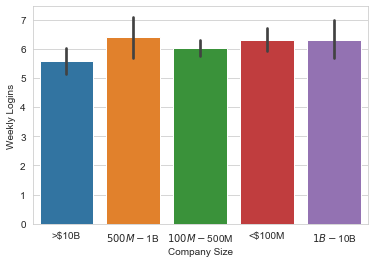

In [10]:
sns.barplot(x=df['Company Size'], y = df['Weekly Logins'])

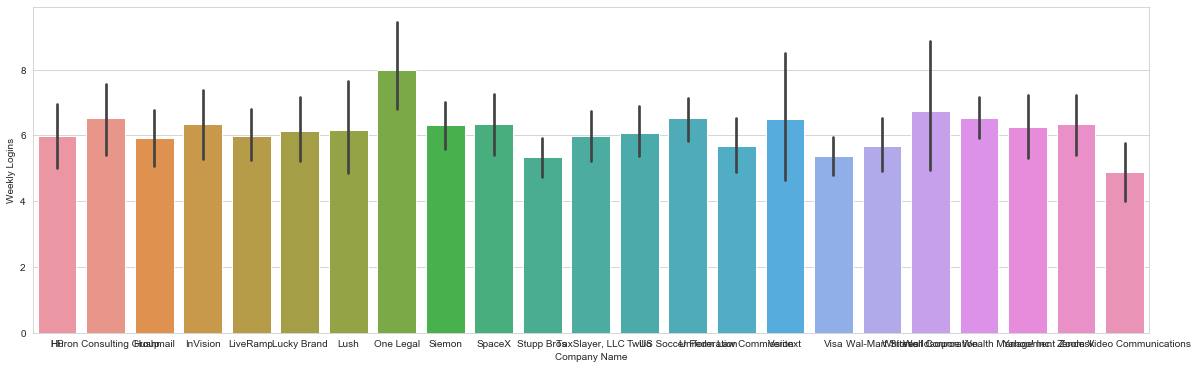

In [11]:
plt.figure(figsize=(20,6))
sns.barplot(x=df['Company Name'], y = df['Weekly Logins'])
# looks like One Legal is the company that had the most weekly logins

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

No v.s. Yes: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.291e-130 U_stat=6.664e+04


(<matplotlib.axes._subplots.AxesSubplot at 0x1a18f70410>,
 [<statannot.StatResult.StatResult at 0x1a196c41d0>])

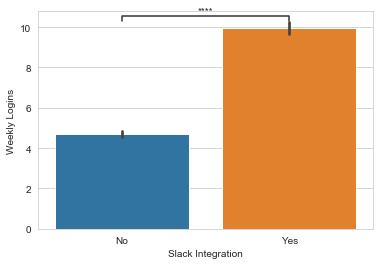

In [33]:
order = pd.unique(df['Slack Integration'])
ax = sns.barplot(data=df, x=df['Slack Integration'], y=df['Weekly Logins'], order=order)
add_stat_annotation(ax, data=df, x=df['Slack Integration'], y=df['Weekly Logins'], order=order,
                    box_pairs=[("No", "Yes")], 
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2)
# slack integration also significantly associated with more weekly logins

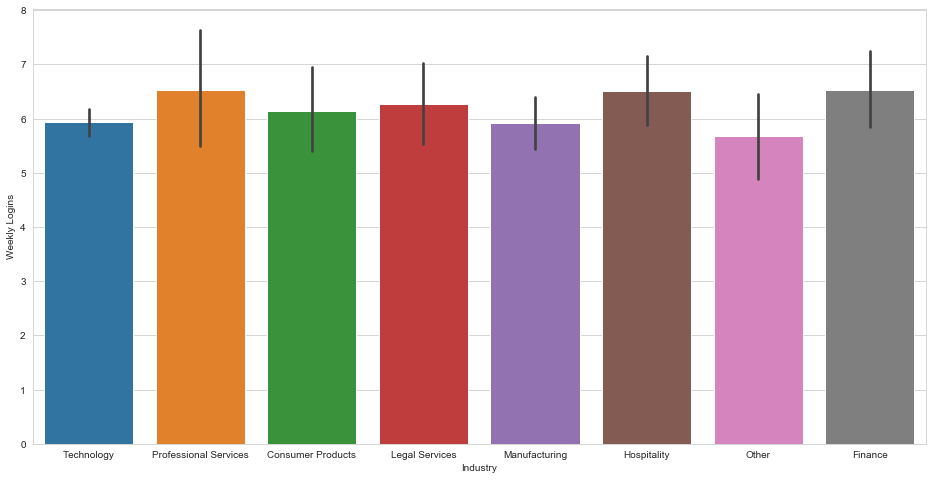

In [14]:
plt.figure(figsize=(16,8))
sns.barplot(x=df['Industry'], y = df['Weekly Logins'])


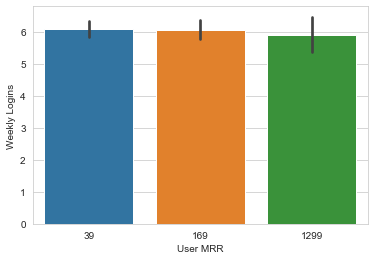

In [15]:
sns.barplot(x=df['User MRR'], y = df['Weekly Logins'])


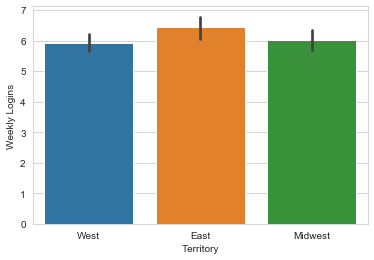

In [16]:
sns.barplot(x=df['Territory'], y = df['Weekly Logins'])


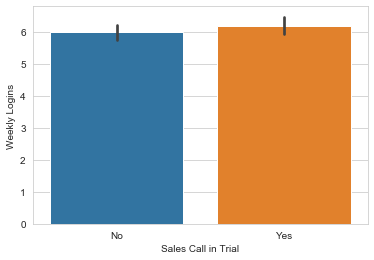

In [17]:
sns.barplot(x=df['Sales Call in Trial'], y = df['Weekly Logins'])

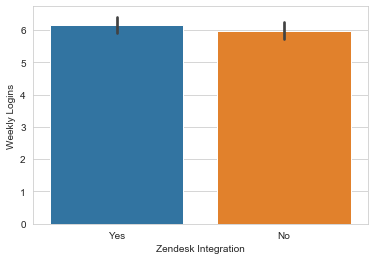

In [18]:
sns.barplot(x=df['Zendesk Integration'], y = df['Weekly Logins'])

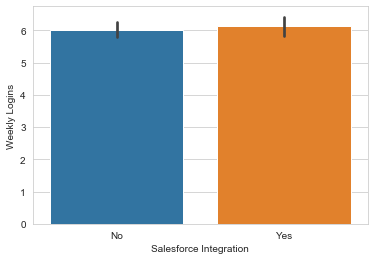

In [19]:
sns.barplot(x=df['Salesforce Integration'], y = df['Weekly Logins'])

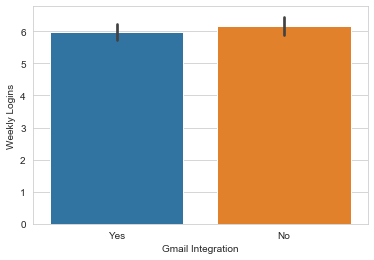

In [20]:
sns.barplot(x=df['Gmail Integration'], y = df['Weekly Logins'])

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

hotels.com v.s. zoom.com: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.286e+04
zoom.com v.s. /mail.google.com: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.120e+04
/mail.google.com v.s. /facebook.com: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.415e+04
/tripadvisor.com v.s. /google.com: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.156e+04
/google.com v.s. /quora: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.251e-01 U_stat=2.553e+04


(<matplotlib.axes._subplots.AxesSubplot at 0x1a1774da10>,
  <statannot.StatResult.StatResult at 0x1a1798a610>])

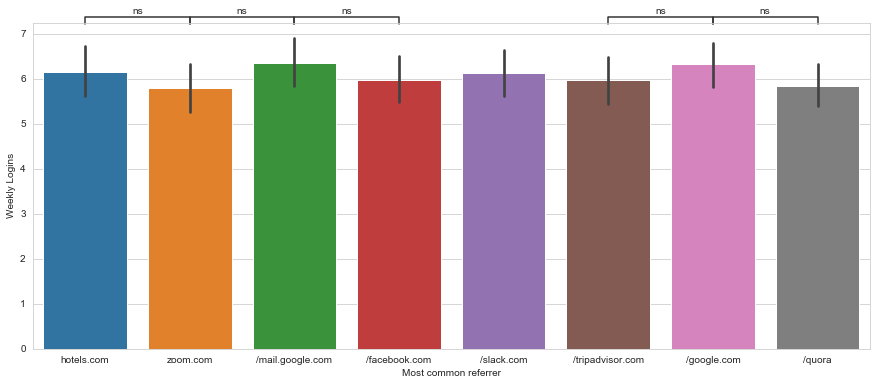

In [23]:
plt.figure(figsize=(15,6))
x = df['Most common referrer']
y = df['Weekly Logins']
order = pd.unique(df['Most common referrer'])

ax = sns.barplot(data=df, x=x, y=y, order=order)
add_stat_annotation(ax, data=df, x=x, y=y, order=order,
                    box_pairs=[("hotels.com", "zoom.com"), 
                               ("zoom.com", "/mail.google.com"),
                               ("/mail.google.com", "/facebook.com"), 
                               ("/tripadvisor.com", "/google.com"),
                               ("/google.com", "/quora")],
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2)


# the most common referrer appears to not be significantly related weekly logins

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

No v.s. Yes: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.776e-208 U_stat=3.741e+04


(<matplotlib.axes._subplots.AxesSubplot at 0x1a1948d750>,
 [<statannot.StatResult.StatResult at 0x1a191d2990>])

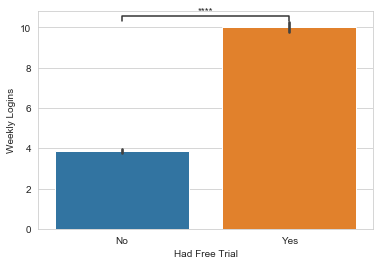

In [32]:
order = pd.unique(df['Had Free Trial'])
ax = sns.barplot(data=df, x=df['Had Free Trial'], y=df['Weekly Logins'], order=order)
add_stat_annotation(ax, data=df, x=df['Had Free Trial'], y=df['Weekly Logins'], order=order,
                    box_pairs=[("No", "Yes")], 
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

# Having had a free trial appears to be significantly related to weekly logins 

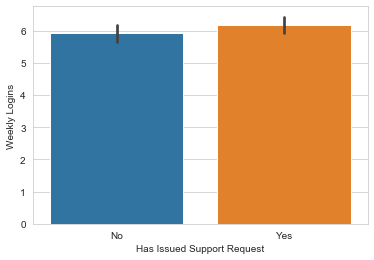

In [25]:
sns.barplot(x=df['Has Issued Support Request'], y = df['Weekly Logins'])

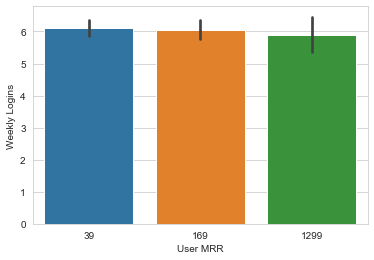

In [26]:
sns.barplot(x=df['User MRR'], y = df['Weekly Logins'])

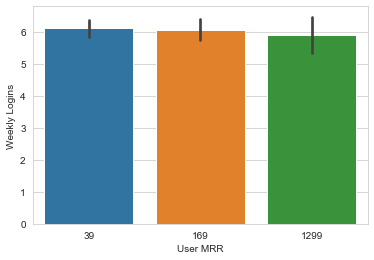

In [27]:
sns.barplot(x=df['User MRR'], y = df['Weekly Logins'])

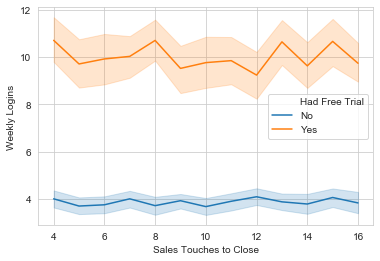

In [28]:
sns.lineplot(x=df['Sales Touches to Close'], y = df['Weekly Logins'], hue=df['Had Free Trial'])

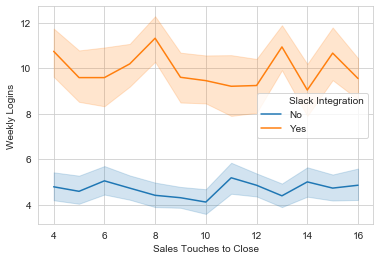

In [29]:
sns.lineplot(x=df['Sales Touches to Close'], y = df['Weekly Logins'], hue=df['Slack Integration'])

# After doing a bit of simple analysis,
##### the things that appear to have the most association with Weekly Logins with statistical significance are:
## Slack Integration = Yes
## Had Free Trial = Yes
## Company = One Legal

Elaboration:
    
Most of the columns contained categorical values. Because we wanted to how these categorical values were related to the numerical value of Weekly Logins, I decided that barplots were the best choice to visualize these data. 
   
My first step in the analysis was loading the data set and understanding it's structure. I calculated some summary statistics and then began to visualize all the categrical data vs. the number of weekly logins. I chose Mann-Whitney tests for significance because I was only comparing two-way data (for the most part). 